In [106]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris,load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display="diagram")

# Step 1: Introduction

Welcome to the dataset inspection!

Let's get started!

# Step 2: Data Preparation

In [107]:
# Load the dataset
#name, target = "airfoil_self_noise.csv", "SPL"
name, target = "ccpp.csv", "PE"
#name, target = "energy.csv", "Y1"
#name, target = "concrete.csv", "CCS"


loaded_data = pd.read_csv(name)
data = loaded_data.drop(columns=[target])
target = loaded_data[target]

numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include='object').columns

transformer = make_column_transformer(((OneHotEncoder(sparse=False)), categorical_cols),remainder='passthrough')
# transforming
data_array = transformer.fit_transform(data)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(data_array, target, test_size=0.2, random_state=42)

# Step 3: Data Exploration

Let's explore the dataset to understand its structure and features.

In [108]:
# Display the number of datapoints (row in a dataframe)
print(data.shape)

# Display the first few rows of the dataset
print(data.head())

# Get basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(data.describe())

# Display dataset information
print(data.info())


(9568, 4)
      AT      V       AP     RH
0  14.96  41.76  1024.07  73.17
1  25.18  62.96  1020.04  59.08
2   5.11  39.40  1012.16  92.14
3  20.86  57.32  1010.24  76.64
4  10.82  37.50  1009.23  96.62

Basic statistics of the dataset:
                AT            V           AP           RH
count  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978
std       7.452473    12.707893     5.938784    14.600269
min       1.810000    25.360000   992.890000    25.560000
25%      13.510000    41.740000  1009.100000    63.327500
50%      20.345000    52.080000  1012.940000    74.975000
75%      25.720000    66.540000  1017.260000    84.830000
max      37.110000    81.560000  1033.300000   100.160000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-nul

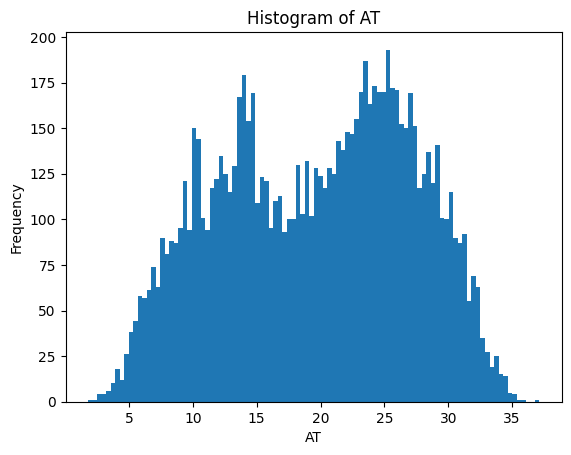

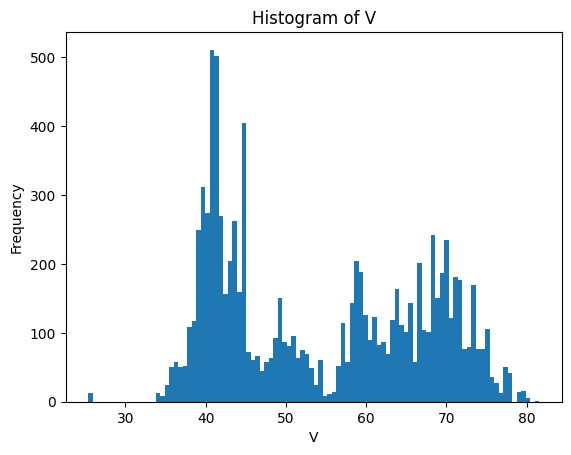

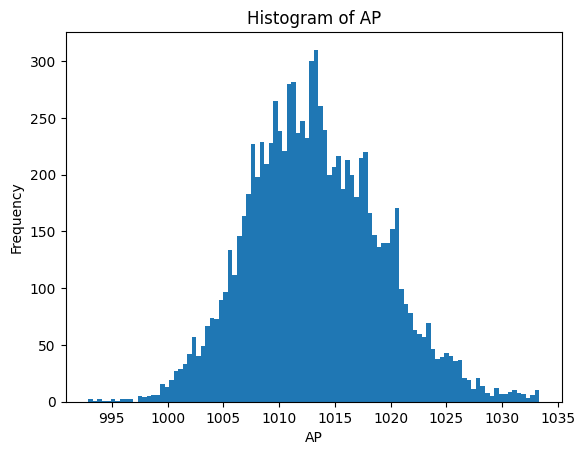

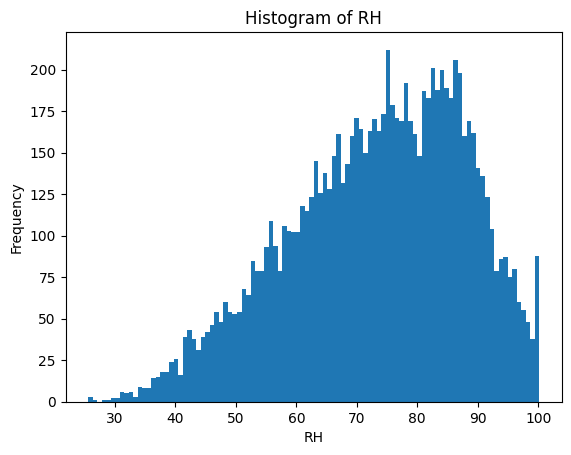

In [109]:
# Create a histogram for numeric columns only
for col in numeric_cols:
    data[col].plot.hist(bins=100)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

In [110]:
# Inspect the distribution of the feature

import scipy
feature = None
#feature = data["x1"]
if feature is not None:
    kurtosis = scipy.stats.kurtosis(feature)
    skew = scipy.stats.skew(feature)
    median = np.median(feature)
    print(f"Kurtosis: {kurtosis}")
    print(f"Skew: {skew}")
    print(f"Median: {median}")
    scipy.stats.normaltest(feature)

# Step 4: Data Preprocessing

Now, let's preprocess the data. 

We'll handle missing values (if any), 

encode categorical features (if any),

and scale numeric features.


In [112]:
# Check missing values and handle them (if any)
## FYI: some algorithms do not handle the data having missing values except Tree-based models.

data.isna().sum()
# Scale numeric features using StandardScaler
## FYI: some of the Machine learning algorithm require and benefit from the data to be in a specific range such as Neural networks, SVMs, K-means clustering, PCA, and Logistic regression.
scaler = MinMaxScaler(feature_range=(-1, 1))
#target = scaler.fit_transform(target.reshape(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Model creation

We'll now create and train different classification models using scikit-learn.

In [113]:
# Create and train a Logistic Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)

LinearRegression()

In [114]:
# Create and train a Decision Tree regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [115]:
# Create and train a Random Forest regressor
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [116]:

# Create and train a Support Vector Machine (SVM) regressor
svm = SVR(kernel='linear')
svm.fit(X_train_scaled, y_train)

SVR(kernel='linear')

# Step 6: Model Evaluation

Let's evaluate the models on the testing data using various evaluation metrics.

In [117]:
#Evaluate the Logistic Regression classifier
y_pred_lr = linear_regression.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression:")
print(f"mse: {mse_lr}")

Linear Regression:
mse: 20.27370599968744


In [118]:
# Evaluate the Decision Tree model
y_pred_dt = decision_tree.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print("Decision Tree Model:")
print(f"mse: {mse_dt}")

Decision Tree Model:
mse: 19.710541118077323


In [119]:
# Evaluate the Random Forest model
y_pred_rf = random_forest.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("\nRandom Forest Model:")
print(f"mse: {mse_rf}")


Random Forest Model:
mse: 10.558126123249679


In [120]:
# Evaluate the Support Vector Machine (SVM) model
y_pred_svm = svm.predict(X_test_scaled)
mse_svm = mean_squared_error(y_test, y_pred_svm)

print("\nSupport Vector Machine (SVM) Model:")
print(f"mse: {mse_svm}")


Support Vector Machine (SVM) Model:
mse: 20.49738628640474
